In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'pandas'

In [30]:

data = pd.read_csv('newspaper_data.tsv',sep='\t')

In [3]:
x = data['Daily'].values
y = data['Sunday '].values

In [4]:
x

array([ 391.952,  516.981,  355.628,  238.555,  537.78 ,  733.775,
        198.832,  252.624,  206.204,  231.177,  449.755,  288.571,
        185.736, 1164.388,  444.581,  412.871,  272.28 ,  781.796,
       1209.225,  825.512,  223.748,  354.843,  515.523,  220.465,
        337.672,  197.12 ,  133.239,  374.009,  273.844,  570.364,
        391.286,  201.86 ,  321.626,  838.902])

In [5]:
y

array([ 488.506,  798.298,  235.084,  299.451,  559.093, 1133.249,
        348.744,  417.779,  344.522,  323.084,  620.752,  423.305,
        202.614, 1531.527,  553.479,  685.975,  324.241,  983.24 ,
       1762.015,  960.308,  284.611,  407.76 ,  982.663,  557.   ,
        440.923,  268.06 ,  262.048,  432.502,  338.355,  704.322,
        585.681,  267.781,  408.343, 1165.567])

In [6]:
class LinearRegression:
    def __init__(self):
        self.w = 0
        self.b = 0
    
    def update_weights(self,x,y):

        return np.dot(x.T,y)/np.dot(x.T,x)

    def fit(self,x,y):
        self.w = self.update_weights(x,y)
        self.b = np.mean(y)- self.w*np.mean(x)
    
    def predict(self,x):
        return self.w*x + self.b


def r2_score( y_true, y_pred):
        '''
            r2 = 1 - (rss/tss)
            rss = sum_{i=0}^{n} (y_i - y_hat)^2
            tss = sum_{i=0}^{n} (y_i - y_bar)^2
        '''
        y_values = y_true
        y_average = np.average(y_values)

        residual_sum_of_squares = 0
        total_sum_of_squares = 0

        for i in range(len(y_values)):
            residual_sum_of_squares += (y_values[i] - y_pred[i])**2
            total_sum_of_squares += (y_values[i] - y_average)**2

        return 1 - (residual_sum_of_squares/total_sum_of_squares)

In [7]:
linear_reg = LinearRegression()
linear_reg.fit(x,y)

In [31]:
data_test = pd.read_csv('newspaper_data_test.tsv',sep='\t')
x_test =data_test['Unnamed: 2'].values
data_test.head()

,SNo Newspaper Daily,Unnamed: 1,Unnamed: 2
0,0,Baltimore Sun,399.297
1,1,Boston Globe,526.642
2,2,Boston Herald,362.315
3,3,Charlotte Observer,243.016
4,4,Chicago Sun Times,547.688


In [32]:
x_test

array([ 399.297,  526.642,  362.315,  243.016,  547.688,  747.401,
        202.617,  257.34 ,  209.993,  235.337,  457.687,  293.657,
        188.955, 1184.007,  452.648,  420.362,  277.201,  795.607,
       1231.58 ,  836.858,  227.097,  360.007,  523.01 ,  223.792,
        342.585,  199.965,  135.057,  376.789,  275.84 ,  574.237,
        394.103,  203.263,  322.517,  838.902])

In [33]:
preds = linear_reg.predict(x)
r2_score(y,preds)

0.9177823580111862

In [34]:
preds_test = linear_reg.predict(x_test)

In [41]:
print('Model Parameters')
print(f'Slope m = {linear_reg.w}')
print(f'Intercept b = {linear_reg.b}')

Model Parameters
Slope m = 1.3629997737529687
Intercept b = 3.8006618569208968


In [36]:
companies_to_exclude = []
for i, row in data_test.iterrows():
    
    if preds_test[i]>row['Unnamed: 2']+.3*row['Unnamed: 2']:
        # print(row['Unnamed: 2']+.3*row['Unnamed: 2'])
        # print(preds_test[i])
        companies_to_exclude.append(row['Unnamed: 1'])
        

print("\nCompanies to Exclude from Sunday Edition Circulation:")
for i in companies_to_exclude:
    print(i)




Companies to Exclude from Sunday Edition Circulation:
Baltimore Sun
Boston Globe
Boston Herald
Charlotte Observer
Chicago Sun Times
Chicago Tribune
Cincinnati Enquirer
Denver Post
Des Moines Register
Hartford Courant
Houston Chronicle
Kansas City Star
Los Angeles Daily News
Los Angeles Times
Miami Herald
Minneapolis Star Tribune
New Orleans Times-Picayune
New York Daily News
New York Times
Newsday
Omaha World Herald
Orange County Register
Philadelphia Inquirer
Pittsburgh Press
Portland Oregonian
Providence Journal-Bulletin
Rochester Democrat & Chronicle
Rocky Mountain News
Sacramento Bee
San Francisco Chronicle
St. Louis Post-Dispatch
St. Paul Pioneer Press
Tampa Tribune
Washington Post


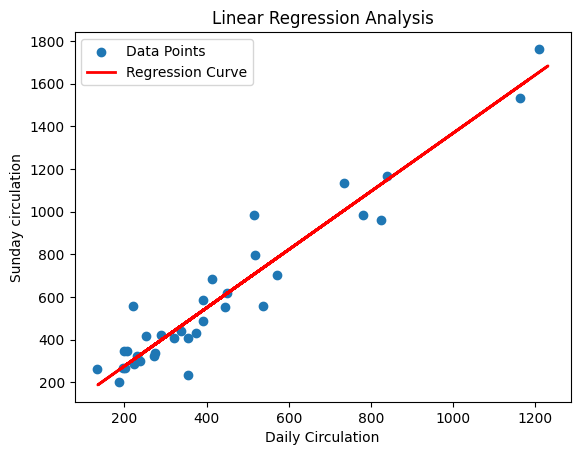

In [37]:
# Plot the data and the predicted regression curve
plt.scatter(x, y, label='Data Points')
plt.plot(x_test, preds_test, color='red', linewidth=2, label='Regression Curve')
plt.xlabel('Daily Circulation')
plt.ylabel('Sunday circulation')
plt.title('Linear Regression Analysis')
plt.legend()
plt.show()


In [39]:
# def transpose_matrix(matrix):
#     rows, cols = len(matrix), len(matrix[0])
#     transposed = [[0] * rows for _ in range(cols)]

#     for i in range(rows):
#         for j in range(cols):
#             transposed[j][i] = matrix[i][j]

#     return transposed

# # Example usage:
# matrix = [[1, 2, 3, 4, 5, 6]]
# transposed_matrix = transpose_matrix(matrix)
# # for row in transposed_matrix:
# #     print(row)


In [40]:
# def dot_product(matrix1, matrix2):
#     if len(matrix1[0]) != len(matrix2):
#         raise ValueError("Number of columns in the first matrix must be equal to the number of rows in the second matrix.")

#     result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]

#     for i in range(len(matrix1)):
#         for j in range(len(matrix2[0])):
#             for k in range(len(matrix2)):
#                 result[i][j] += matrix1[i][k] * matrix2[k][j]

#     return result

# # Example usage:

# result_matrix = dot_product(matrix, transposed_matrix)
# # for row in result_matrix:
# #     print(row)
